In [1]:
import numpy as np
import matplotlib.pyplot as plt

import cv2 as cv
import os

from ultralytics import YOLO
import torch

import pickle

In [2]:
video_path = "./input_videos/input_video.mp4"

read_from_stub=True
stub_path=True

In [3]:
cap = cv.VideoCapture(video_path)
input_frames = []
while True:
    ret, frame = cap.read()
    if not ret:
        break
    input_frames.append(frame)
cap.release()

In [ ]:
person_tracking_model = YOLO("./yolov8x.pt")

def detect_player_frames(frames, read_from_stub=False, stub_path=None):
    player_detections = []

    if read_from_stub and stub_path is not None:
        with open(stub_path, 'rb') as f:
            player_detections = pickle.load(f)
        return player_detections

    for frame in frames:
        player_dict = detect_player_frame(frame)
        player_detections.append(player_dict)
    
    if stub_path is not None:
        with open(stub_path, 'wb') as f:
            pickle.dump(player_detections, f)
    
    return player_detections

def detect_player_frame(frame):
    results = person_tracking_model.track(frame, persist=True)[0]
    id_name_dict = results.names

    player_dict = {}
    for box in results.boxes:
        track_id = int(box.id.tolist()[0])
        result = box.xyxy.tolist()[0]
        object_cls_id = box.cls.tolist()[0]
        object_cls_name = id_name_dict[object_cls_id]
        if object_cls_name == "person":
            player_dict[track_id] = result
    
    return player_dict

def draw_bboxes(video_frames, player_detections):
    output_video_frames = []
    for frame, player_dict in zip(video_frames, player_detections):
        # Draw Bounding Boxes
        for track_id, bbox in player_dict.items():
            x1, y1, x2, y2 = bbox
            cv.putText(frame, f"Player ID: {track_id}",(int(bbox[0]),int(bbox[1] -10 )),cv.FONT_HERSHEY_SIMPLEX, 0.9, (0, 0, 255), 2)
            cv.rectangle(frame, (int(x1), int(y1)), (int(x2), int(y2)), (0, 0, 255), 2)
        output_video_frames.append(frame)
    
    return output_video_frames

In [5]:
ball_tracking_model = YOLO("./models/last_100.pt")

def detect_ball_frames(frames, read_from_stub=False, stub_path=None):
    ball_detections = []

    if read_from_stub and stub_path is not None:
        with open(stub_path, 'rb') as f:
            ball_detections = pickle.load(f)
        return ball_detections

    for frame in frames:
        player_dict = detect_ball_frame(frame)
        ball_detections.append(player_dict)
    
    if stub_path is not None:
        with open(stub_path, 'wb') as f:
            pickle.dump(ball_detections, f)
    
    return ball_detections

def detect_ball_frame(frame):
    results = ball_tracking_model.predict(frame,conf=0.15)[0]

    ball_dict = {}
    for box in results.boxes:
        result = box.xyxy.tolist()[0]
        ball_dict[1] = result
    
    return ball_dict

def draw_bboxes(video_frames, player_detections):
    output_video_frames = []
    for frame, ball_dict in zip(video_frames, player_detections):
        # Draw Bounding Boxes
        for track_id, bbox in ball_dict.items():
            x1, y1, x2, y2 = bbox
            cv.putText(frame, f"Ball ID: {track_id}",(int(bbox[0]),int(bbox[1] -10 )),cv.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 255), 2)
            cv.rectangle(frame, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 255), 2)
        output_video_frames.append(frame)
    
    return output_video_frames

In [6]:
player_detection = detect_player_frames(input_frames)
ball_detection = detect_ball_frames(input_frames)


0: 384x640 8 persons, 2 tennis rackets, 2 chairs, 2 clocks, 69.2ms
Speed: 3.8ms preprocess, 69.2ms inference, 157.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 8 persons, 2 tennis rackets, 2 chairs, 2 clocks, 35.7ms
Speed: 2.6ms preprocess, 35.7ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 8 persons, 2 tennis rackets, 2 chairs, 2 clocks, 34.9ms
Speed: 2.4ms preprocess, 34.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 8 persons, 2 tennis rackets, 2 chairs, 2 clocks, 34.5ms
Speed: 3.0ms preprocess, 34.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 8 persons, 2 tennis rackets, 2 chairs, 2 clocks, 35.2ms
Speed: 2.1ms preprocess, 35.2ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 8 persons, 1 tennis racket, 2 chairs, 2 clocks, 32.4ms
Speed: 2.4ms preprocess, 32.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x6

In [7]:
output_video_frames = []

In [8]:
output_video_frames= draw_bboxes(input_frames, player_detection)
output_video_frames= draw_bboxes(output_video_frames, ball_detection)

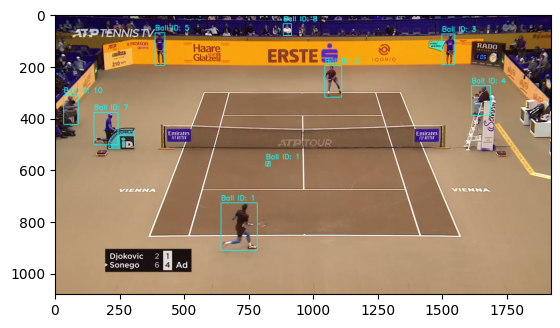

In [10]:
plt.imshow(output_video_frames[15])

In [14]:
transformed_image.shape

torch.Size([1, 3, 1080, 1920])

0

In [24]:
kps_pred = kps_model(transformed_image.cuda())
# kps_pred.cpu().detach().numpy()

NameError: name 'kps_model' is not defined

In [16]:
input_frames[15].shape

(1080, 1920, 3)

In [17]:
transformed_image.shape

torch.Size([1, 3, 1080, 1920])

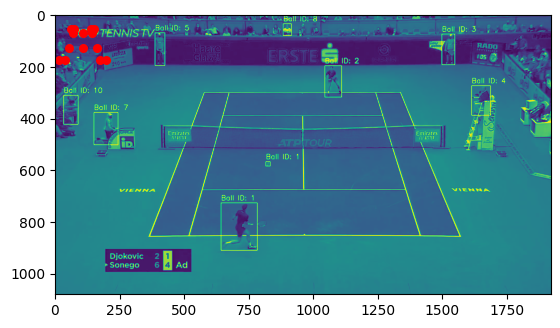

In [ ]:
plt.imshow(transformed_image[0][0].cpu())
plt.scatter(kps_pred.cpu().detach().numpy()[0,::2], kps_pred.cpu().detach().numpy()[0,1::2], s=30, c='red')
plt.show()

In [1]:
from utils import capture_video, save_video
from tracker import PlayerTracker
from tracker import BallTracker

In [2]:
input_video_path = "input_videos/input_video.mp4"
video_frames = capture_video(input_video_path)

player_tracker = PlayerTracker(model_path="./yolov8x.pt")
ball_tracker = BallTracker(model_path="models/last_100.pt")

player_detection = player_tracker.detect_frames(video_frames, read_from_stub=True, stub_path="tracker_stubs/player_detection.pkl")
ball_detection = ball_tracker.detect_frames(video_frames, read_from_stub=True, stub_path="tracker_stubs/ball_detection.pkl")



In [3]:
import pandas as pd

In [4]:
ball_positions = [x.get(1,[]) for x in ball_detection]

df_ball_positions = pd.DataFrame(ball_positions,columns=['x1','y1','x2','y2'])

df_ball_positions = df_ball_positions.interpolate()
df_ball_positions = df_ball_positions.bfill()

ball_positions = [{1:x} for x in df_ball_positions.to_numpy().tolist()]


In [10]:
import torch
import torchvision.transforms as transforms
import cv2
from torchvision import models
import numpy as np
import matplotlib.pyplot as plt

In [6]:
kpts_model = models.resnet50(pretrained=True)
kpts_model.fc = torch.nn.Linear(kpts_model.fc.in_features, 14*2) 
kpts_model.load_state_dict(torch.load("kps_model.pth", map_location='cpu'))
kps_img_transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

/home/laksh/miniconda3/envs/research/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/laksh/miniconda3/envs/research/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [51]:
image = video_frames[15]
original_h, original_w = image.shape[:2]
image_tensor = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_tensor = kps_img_transform(image_tensor).unsqueeze(0)

image_tensor.shape, image.shape, original_h, original_w

(torch.Size([1, 3, 224, 224]), (1080, 1920, 3), 1080, 1920)

In [78]:
with torch.no_grad():
    kps = kpts_model(image_tensor)

# keypoints = kps.squeeze().cpu().numpy()
keypoints = kps.cpu().numpy()
keypoints[::2] *= 1920 / 224
keypoints[1::2] *= 1080 / 224

In [79]:
keypoints

array([[     603.47,      548.38,      1337.2,      549.13,      349.04,      1516.4,      1569.6,      1523.9,      695.09,       548.4,      501.06,      1517.4,        1244,      549.12,      1416.2,      1523.2,      663.44,      694.93,      1269.5,      695.68,      564.77,        1192,      1362.5,
             1196.1,      962.84,      695.02,      964.17,      1193.9]], dtype=float32)

(1080, 1920, 3)


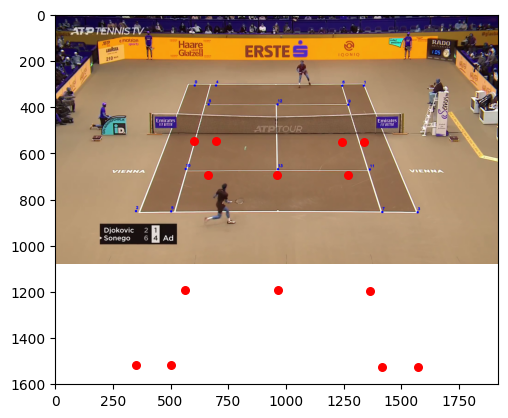

In [80]:
plt.imshow(image)
print(image.shape)
plt.scatter(keypoints[0,::2], keypoints[0,1::2], s=30, c='red')
plt.show()

In [60]:
for i in range(0, len(keypoints), 2):
    x = int(keypoints[i])
    y = int(keypoints[i+1])
    # cv2.putText(image, str(i//2), (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)
    # cv2.circle(image, (x, y), 5, (0, 0, 255), -1)

TypeError: only length-1 arrays can be converted to Python scalars

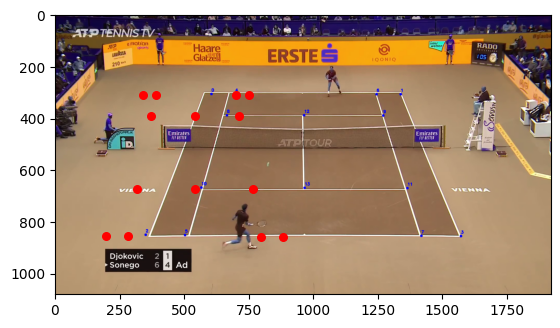

In [71]:
plt.imshow(image)
plt.scatter(keypoints[0,::2], keypoints[0,1::2], s=30, c='red')
plt.show()

In [13]:
video_frames = player_tracker.draw_bboxes(video_frames, player_detection)
video_frames = ball_tracker.draw_bboxes(video_frames, ball_detection)
        
# save_video(video_frames, "output/output_video.avi")

In [1]:
from utils import capture_video, save_video
# from utils import choose_players

from tracker import PlayerTracker
from tracker import BallTracker
from tracker import CourtKpsDetector

In [2]:
input_video_path = "input_videos/input_video.mp4"
video_frames = capture_video(input_video_path)

player_tracker = PlayerTracker(model_path="./yolov8x.pt")
ball_tracker = BallTracker(model_path="models/last_100.pt")
kpts_detector = CourtKpsDetector(model_path="./kps_model.pth")

player_detection = player_tracker.detect_frames(video_frames, read_from_stub=True, stub_path="tracker_stubs/player_detection.pkl")
court_keypoints = kpts_detector.predict(video_frames[0])
# player_detection = player_tracker.detect_frames(video_frames[0])
ball_detection = ball_tracker.detect_frames(video_frames, read_from_stub=True, stub_path="tracker_stubs/ball_detection.pkl")
ball_detection = ball_tracker.interpolate_ball_positions(ball_detection)


/home/laksh/miniconda3/envs/research/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/laksh/miniconda3/envs/research/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [11]:
players = player_detection
kps =  court_keypoints

In [12]:
from utils import calculate_player_centres, calculate_min_distance

In [13]:
len(players)

214

In [14]:
def choose_players(self, kps, players):
    p1, p2 = filter_players(None, kps, players[0])
    filtered_player_detections = []
    
    for player_dicts in players:
        print({p1: player_dicts[p1], p2: player_dicts[p2]})
        filtered_player_detections.append({p1: player_dicts[p1], p2: player_dicts[p2]})
    
    return filtered_player_detections
    # return {p1: players[p1], p2: players[p2]}

def filter_players(self, kps, players):
    player_center = calculate_player_centres(players)
    for i, p_nums in enumerate(list(player_center.keys())):
        player_center[p_nums] = float(calculate_min_distance(kps, player_center[p_nums]))
    
    player_center = dict(sorted(player_center.items(), key=lambda item: item[1]))
    p1, p2 = list(player_center.keys())[:2]
    return p1, p2
    # return {p1: players[p1], p2: players[p2]}

In [16]:
choose_players(None, kps, players)

{1: [480.2899169921875, 751.6080322265625, 624.820556640625, 930.5987548828125], 2: [1030.575439453125, 201.66860961914062, 1095.8953857421875, 308.5273132324219]}
{1: [481.44635009765625, 750.046142578125, 632.7084350585938, 931.3858032226562], 2: [1032.2086181640625, 202.9091796875, 1101.86474609375, 309.1527099609375]}
{1: [483.971923828125, 749.2769165039062, 646.82080078125, 931.2607421875], 2: [1032.0281982421875, 205.54364013671875, 1098.309326171875, 308.8100280761719]}
{1: [491.4676208496094, 746.07958984375, 662.1849365234375, 931.06982421875], 2: [1033.4158935546875, 208.10630798339844, 1096.911376953125, 308.5152893066406]}
{1: [499.16168212890625, 744.7155151367188, 673.1800537109375, 930.7655029296875], 2: [1036.111083984375, 208.03712463378906, 1096.9652099609375, 307.62896728515625]}
{1: [508.6148681640625, 740.9249877929688, 686.1666259765625, 930.4331665039062], 2: [1038.384521484375, 206.46018981933594, 1101.076416015625, 307.47003173828125]}
{1: [528.89013671875, 73

[{1: [480.2899169921875,
   751.6080322265625,
   624.820556640625,
   930.5987548828125],
  2: [1030.575439453125,
   201.66860961914062,
   1095.8953857421875,
   308.5273132324219]},
 {1: [481.44635009765625,
   750.046142578125,
   632.7084350585938,
   931.3858032226562],
  2: [1032.2086181640625,
   202.9091796875,
   1101.86474609375,
   309.1527099609375]},
 {1: [483.971923828125, 749.2769165039062, 646.82080078125, 931.2607421875],
  2: [1032.0281982421875,
   205.54364013671875,
   1098.309326171875,
   308.8100280761719]},
 {1: [491.4676208496094, 746.07958984375, 662.1849365234375, 931.06982421875],
  2: [1033.4158935546875,
   208.10630798339844,
   1096.911376953125,
   308.5152893066406]},
 {1: [499.16168212890625,
   744.7155151367188,
   673.1800537109375,
   930.7655029296875],
  2: [1036.111083984375,
   208.03712463378906,
   1096.9652099609375,
   307.62896728515625]},
 {1: [508.6148681640625,
   740.9249877929688,
   686.1666259765625,
   930.4331665039062],
  2: 

In [17]:
player_detection = choose_players(None, kps, players)

{1: [480.2899169921875, 751.6080322265625, 624.820556640625, 930.5987548828125], 2: [1030.575439453125, 201.66860961914062, 1095.8953857421875, 308.5273132324219]}
{1: [481.44635009765625, 750.046142578125, 632.7084350585938, 931.3858032226562], 2: [1032.2086181640625, 202.9091796875, 1101.86474609375, 309.1527099609375]}
{1: [483.971923828125, 749.2769165039062, 646.82080078125, 931.2607421875], 2: [1032.0281982421875, 205.54364013671875, 1098.309326171875, 308.8100280761719]}
{1: [491.4676208496094, 746.07958984375, 662.1849365234375, 931.06982421875], 2: [1033.4158935546875, 208.10630798339844, 1096.911376953125, 308.5152893066406]}
{1: [499.16168212890625, 744.7155151367188, 673.1800537109375, 930.7655029296875], 2: [1036.111083984375, 208.03712463378906, 1096.9652099609375, 307.62896728515625]}
{1: [508.6148681640625, 740.9249877929688, 686.1666259765625, 930.4331665039062], 2: [1038.384521484375, 206.46018981933594, 1101.076416015625, 307.47003173828125]}
{1: [528.89013671875, 73

In [18]:
player_detection[0]

{1: [480.2899169921875,
  751.6080322265625,
  624.820556640625,
  930.5987548828125],
 2: [1030.575439453125,
  201.66860961914062,
  1095.8953857421875,
  308.5273132324219]}

In [19]:
video_frames = player_tracker.draw_bboxes(video_frames, player_detection)
video_frames = ball_tracker.draw_bboxes(video_frames, ball_detection)
video_frames  = kpts_detector.draw_keypoints_on_video(video_frames, court_keypoints)
        

In [20]:
save_video(video_frames, "output/output_video.avi")

In [1]:
import numpy as np

from utils import capture_video, save_video
from tracker import PlayerTracker
from tracker import BallTracker
from tracker import CourtKpsDetector

In [2]:
input_video_path = "input_videos/input_video.mp4"
video_frames = capture_video(input_video_path)

player_tracker = PlayerTracker(model_path="./yolov8x.pt")
ball_tracker = BallTracker(model_path="models/last_100.pt")
kpts_detector = CourtKpsDetector(model_path="./kps_model.pth")

court_keypoints = kpts_detector.predict(video_frames[0])

/home/laksh/miniconda3/envs/research/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/laksh/miniconda3/envs/research/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [61]:
kps = court_keypoints
kps = kps.reshape(-1, 2)

x_coords = kps[:, 0]
y_coords = kps[:, 1]

print(x_coords)

[     604.29      1337.8      348.48      1571.5      695.89       500.8      1244.7      1417.8      664.17      1270.2       565.1      1363.6      963.55       964.9]


In [18]:
import matplotlib.pyplot as plt

In [60]:
np.min(x_coords)

np.float32(348.4805)

In [86]:
kps

array([[     604.29,      308.53],
       [     1337.8,      308.98],
       [     348.48,      853.44],
       [     1571.5,      857.78],
       [     695.89,      308.53],
       [      500.8,      854.01],
       [     1244.7,      308.97],
       [     1417.8,      857.37],
       [     664.17,      390.88],
       [     1270.2,      391.33],
       [      565.1,      670.57],
       [     1363.6,      672.91],
       [     963.55,      390.94],
       [      964.9,      671.68]], dtype=float32)

In [89]:
kps[np.argmin(kps[:, 0])]

array([     348.48,      853.44], dtype=float32)

In [91]:
np.min(kps[:,1])

np.float32(308.52994)

In [73]:
print(float(np.min(x_coords)), float(np.max(y_coords)))
print(float(np.max(x_coords)), float(np.max(y_coords)))
print(float(np.min(y_coords)), float(np.max(y_coords)))

348.4804992675781 857.7811279296875
1571.480224609375 857.7811279296875
308.5299377441406 857.7811279296875


In [98]:
kps[:4]

array([[     604.29,      308.53],
       [     1337.8,      308.98],
       [     348.48,      853.44],
       [     1571.5,      857.78]], dtype=float32)

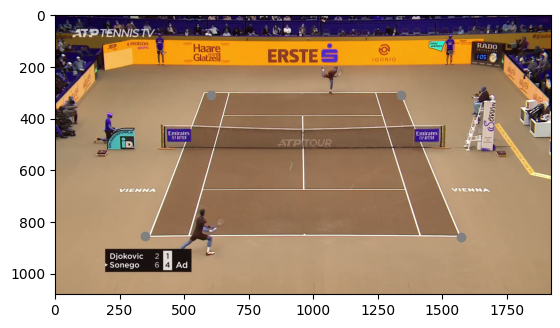

In [ ]:
plt.imshow(video_frames[0])
for x, y in kps[0:4]:
    plt.scatter(x, y, color='gray')

In [ ]:
rightmost

array([     1571.5,      857.78], dtype=float32)

In [ ]:
rightmost

array([     1571.5,      857.78], dtype=float32)

array([[     604.29,      308.53],
       [     1337.8,      308.98],
       [     348.48,      853.44],
       [     1571.5,      857.78]], dtype=float32)

In [ ]:
import cv2

cropped_image = image[y_min:y_max, x_min:x_max]

new_width, new_height = 100, 100  # Example dimensions
resized_image = cv2.resize(cropped_image, (new_width, new_height))

cv2.imwrite("resized_image.jpg", resized_image)
cv2.imshow("Resized Image", resized_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [106]:
import cv2

src_points = np.array([
    [604.29, 308.53],
    [1337.8, 308.98],
    [1571.5, 857.78],
    [348.48, 853.44]
], dtype=np.float32)

# Define the desired output size (e.g., 800x400)
output_width, output_height = 400, 800
dst_points = np.array([
    [0, 0],
    [output_width - 1, 0],
    [output_width - 1, output_height - 1],
    [0, output_height - 1]
], dtype=np.float32)

# Compute the perspective transformation matrix
try:
    matrix = cv2.getPerspectiveTransform(src_points, dst_points)
except Exception as e:
    print(f"Error computing perspective transform: {e}")

# Apply the perspective warp to transform the court into a rectangle
warped_image = cv2.warpPerspective(video_frames[0], matrix, (output_width, output_height))



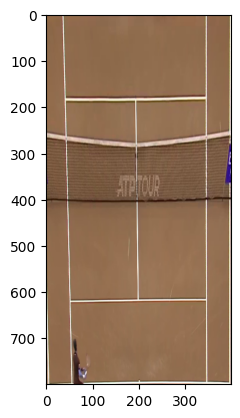

In [107]:
plt.imshow(warped_image)